<a href="https://colab.research.google.com/github/abhimanyubhowmik/ML_Fundamentals/blob/main/Linear_Algebra/Moore_Penrose_Pseudoinverse_and_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###The Moore-Penrose Pseudoinverse

Formula to calculate the pseudoinverse $A^+$ of some matrix $A$ is:

$A^+ = V Σ^+U^T$

In [72]:
import numpy as np
import pandas as pd
import torch
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
A = np.array([[-1, 2], [3, -2], [5, 7]])
A

array([[-1,  2],
       [ 3, -2],
       [ 5,  7]])

In [7]:
U, sigma, VT = np.linalg.svd(A)

In [8]:
Sigma = np.diag(sigma)
Sigma

array([[8.66918448, 0.        ],
       [0.        , 4.10429538]])

In [14]:
Sigma_inv = np.linalg.inv(Sigma)
Sigma_inv

array([[0.1153511 , 0.        ],
       [0.        , 0.24364718]])

In [20]:
Sigma_plus = np.concatenate((Sigma_inv,np.array([[0,0]]).T), axis= 1)
Sigma_plus

array([[0.1153511 , 0.        , 0.        ],
       [0.        , 0.24364718, 0.        ]])

In [21]:
np.dot(VT.T,np.dot(Sigma_plus,U.T))

array([[-0.08767773,  0.17772512,  0.07582938],
       [ 0.07661927, -0.1192733 ,  0.08688784]])

In [22]:
#By using numpy library
np.linalg.pinv(A)

array([[-0.08767773,  0.17772512,  0.07582938],
       [ 0.07661927, -0.1192733 ,  0.08688784]])

In [23]:
A_p = torch.tensor([[-1, 2], [3, -2], [5, 7.]])
A_p

tensor([[-1.,  2.],
        [ 3., -2.],
        [ 5.,  7.]])

In [24]:
torch.pinverse(A_p)

tensor([[-0.0877,  0.1777,  0.0758],
        [ 0.0766, -0.1193,  0.0869]])

### Resgression Problem Using the Moore-Penrose Pseudoinverse

For regression problems, we typically have many more cases ($n$, or rows of $X$) than features to predict (columns of $X$). Let's solve a miniature example of such an overdetermined situation. 

We have eight data points ($n$ = 8): 

In [42]:
x1 = [0, 1, 2, 3, 4, 5, 6, 7.] # E.g.: Dosage of drug for treating Alzheimer's disease
y = [1.86, 1.31, .62, .33, .09, -.67, -1.23, -1.37] # E.g.: Patient's "forgetfulness score"

Text(0.5, 1.0, 'Clinical Trial')

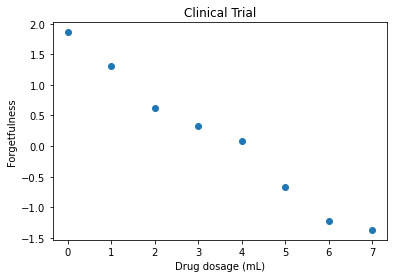

In [29]:
_ = plt.scatter(x1,y)
plt.xlabel('Drug dosage (mL)')
plt.ylabel('Forgetfulness')
plt.title('Clinical Trial')

$y = ax_1 + bx_0$

where : $x_0 = Const. $ 

In [31]:
x0 = np.ones(8)
x0

array([1., 1., 1., 1., 1., 1., 1., 1.])

In [44]:
X = np.concatenate((np.matrix(x1).T,np.matrix(x0).T),axis = 1)
X

matrix([[0., 1.],
        [1., 1.],
        [2., 1.],
        [3., 1.],
        [4., 1.],
        [5., 1.],
        [6., 1.],
        [7., 1.]])

In [52]:
w = np.array(np.dot(np.linalg.pinv(X),y)).reshape(-1)
w

array([-0.46928571,  1.76      ])

In [54]:
b = w[1]
b

1.7600000000000002

In [55]:
a = w[0]
a

-0.4692857142857143

In [60]:
from numpy.core.function_base import linspace
x_line = linspace(0,7,100)
y_line = a*x_line + b

Text(0.5, 1.0, 'Clinical Trial')

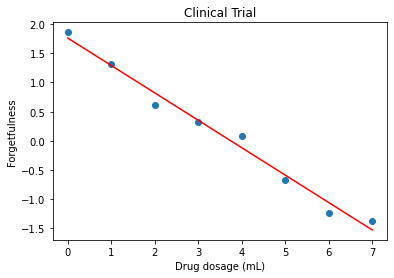

In [61]:
_ = plt.scatter(x1,y)
_ = plt.plot(x_line,y_line,c = 'r')
plt.xlabel('Drug dosage (mL)')
plt.ylabel('Forgetfulness')
plt.title('Clinical Trial')

### Principal Component Analysis

In [62]:
from sklearn import datasets
iris = datasets.load_iris()

In [63]:
iris.data.shape

(150, 4)

In [64]:
iris.get("feature_names")

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

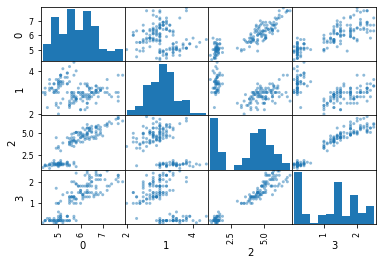

In [75]:
_ = pd.plotting.scatter_matrix(pd.DataFrame(iris.data))

In [68]:
from sklearn.decomposition import PCA
pca = PCA(n_components= 2)
X = pca.fit_transform(iris.data)
X[:5,:]

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451]])

In [69]:
X.shape

(150, 2)

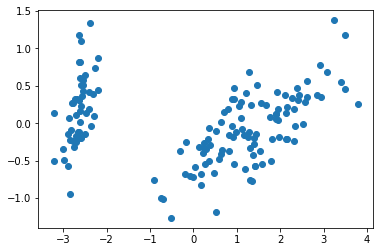

In [76]:
_ = plt.scatter(X[:, 0], X[:, 1])

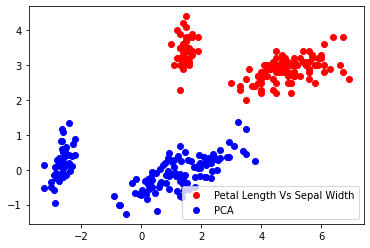

In [83]:
pl_sw = plt.scatter(iris.data[:,2],iris.data[:,1],c = 'r',label = 'Petal Length Vs Sepal Width')
pca = plt.scatter(X[:, 0], X[:, 1],c = 'b', label = 'PCA')
plt.legend(loc='lower right')

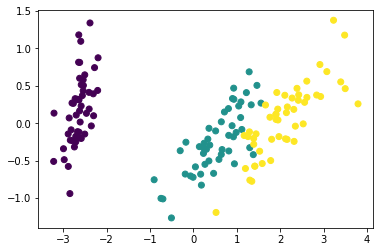

In [84]:
_ = plt.scatter(X[:, 0], X[:, 1], c = iris.target)

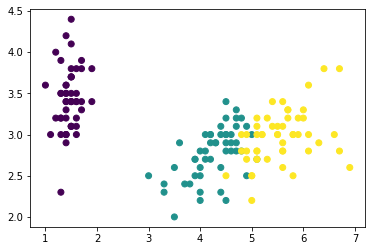

In [85]:
pl_sw = plt.scatter(iris.data[:,2],iris.data[:,1],c = iris.target,label = 'Petal Length Vs Sepal Width')